In [1]:
# m_j = m_2
# m_i = m_1  and m_2< equal to m_1.

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
from matplotlib import rcParams



plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})    


π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
pc = 3.0857e16            # in meters
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of seconds
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
t_0 = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr

σ_eq = 0.005
ρ_m = 4e19                #ρ_m = 4e19 M☉ Gpc^-3




m_min = 5  #in units of M☉

m_1 = 7   #in units of M☉
m_2 = 9    #in units of M☉



y_1 = np.log(m_1)
y_2 = np.log(m_2)
dy = (y_2-y_1)


y_list = np.zeros(11)

for i in range(len(y_list)):
    y_list[i] = (y_1 + (i*dy))
    

M_1_list = np.zeros(len(y_list))
M_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    M_1_list[i] = (np.ceil(np.exp(y)))
    M_2_list[i] = (np.ceil(np.exp(y)))
    

            
m_1_list = [int(M_1) for M_1 in M_1_list]
m_2_list = [int(M_2) for M_2 in M_2_list]

    
Δ_1_list = np.zeros(len(y_list))
Δ_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    Δ_1_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy)
    Δ_2_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy) 

    
print("m_1 =", m_1_list, "M☉")
print("Δ_1 =", Δ_1_list)





m_1 = [7, 10, 12, 15, 20, 25, 32, 41, 53, 68, 87] M☉
Δ_1 = [ 1.76383421  2.26778684  2.91572593  3.74879049  4.81987348  6.19698019
  7.96754596 10.24398767 13.17084129 16.9339388  21.77220702]


In [2]:
# Probalility distribution of X of PBH binaries without and with halos for PBHs mass range of 5 M☉-100 M☉ .
        
def P_X( m_2, Δ_2,  X):
    
    def f_(m):
        return f*P(m)

    def f_b(m_1,m_2):
        return  f_(m_1) + f_(m_2)

    def λ(m_1, m_2, Δ_1, Δ_2, X):   #λ_0
        return  X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))
    
    
    def PDF(m):
        return (P(m)/m)


    I = quad(PDF, m_min, np.inf)             # Taking limits of the PBH mass from m_min M☉ to 100 M☉ instead of 
                                             # 0 to infinity.

    n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

    def x̄(m_1,m_2,Δ_1,Δ_2):
        return (((3 * (m_1 + m_2))/(8 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))
    
    return  np.exp(-((4*π)/3)  * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T * X)
        
      

In [3]:
m_1 = m_1_list[-1] 

Δ_1 = Δ_1_list[-1]

m_2 = [m_2_list[0], m_2_list[3], m_2_list[5], m_2_list[7], m_2_list[-1]]

Δ_2 = [Δ_2_list[0], Δ_2_list[3], Δ_2_list[5], Δ_2_list[7], Δ_2_list[-1]]


X = np.geomspace(1e-5, 1, 1000000) 




f_pbh = 4.3e-3
f = 0.85*f_pbh
        
          
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 5     #in units of M☉, for PBHs mass range of 5 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))




plt.figure(figsize = (7,4))

for (m_2, Δ_2, X) in enumerate(zip(m_2, Δ_2, X)):
    plt.plot(X, P_X(m_2, Δ_2,  X),'')
    
    
plt.xlabel('$X$', fontsize = 12)
plt.ylabel('$P(X)$', fontsize = 12)
plt.title('Power Law PDF', fontsize = 15)
plt.show()

ValueError: not enough values to unpack (expected 3, got 2)

<Figure size 504x288 with 0 Axes>

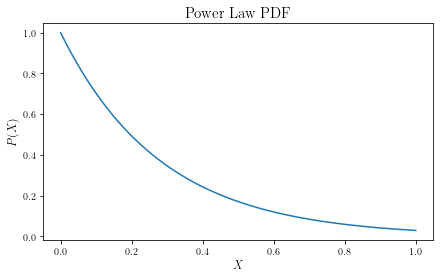

In [23]:
m_1 = m_1_list[0]

m_2 = m_2_list[3]

Δ_1 = Δ_1_list[0]

Δ_2 = Δ_2_list[3]


X = np.geomspace(1e-5, 1, 1000000) 




f_pbh = 4.3e-3
f = 0.85*f_pbh
        
          
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 5     #in units of M☉, for PBHs mass range of 5 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))



plt.figure(figsize = (7,4))
plt.plot(X, P_X(m_1, m_2, Δ_1, Δ_2, t_m, X),'C0')
plt.xlabel('$X$', fontsize = 12)
plt.ylabel('$P(X)$', fontsize = 12)
plt.title('Power Law PDF', fontsize = 15)
plt.show()

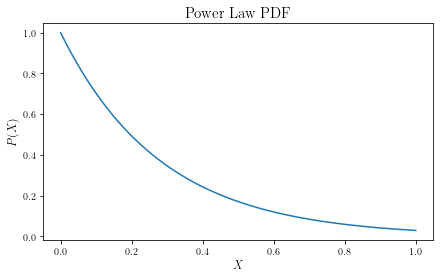

In [24]:
m_1 = m_1_list[0]

m_2 = m_2_list[3]

Δ_1 = Δ_1_list[0]

Δ_2 = Δ_2_list[3]


X = np.geomspace(1e-5, 1, 1000000) 




f_pbh = 4.3e-3
f = 0.85*f_pbh
        
          
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 5     #in units of M☉, for PBHs mass range of 5 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))



plt.figure(figsize = (7,4))
plt.plot(X, P_X(m_1, m_2, Δ_1, Δ_2, t_m, X),'C0')
plt.xlabel('$X$', fontsize = 12)
plt.ylabel('$P(X)$', fontsize = 12)
plt.title('Power Law PDF', fontsize = 15)
plt.show()